# FINAL 1

# Machine Learning: Supervised - Linear Regression in Python

# NAME : VIJAYA DURGA BANDI - 11601151

# Importing the basic libraries

This code block below is performing the initial setup for data analysis and machine learning tasks. It imports essential libraries such as Pandas and NumPy for data handling, seaborn and matplotlib for visualization, and scikit-learn for building machine learning models. The code sets up the environment for further data manipulation, exploration, model creation, and evaluation.
pandas and numpy: These are basic libraries for data manipulation and statistical computation. It is mostly used to manipulate structured data in the form of DataFrames and arrays.

scatter_matrix from pandas.plotting: This function is used to create scatter plots against each other for all numeric lines in the DataFrame. It helps to visualize relationships and relationships between different things.

seaborn: This library is built on top of matplotlib and provides a high level interface for creating interesting and informative numerical visualizations. By setting sns.set(color_codes=True), seaborn is configured to use its default color palette for plotting.

matplotlib.pyplot: This is a powerful library for creating various types of plot graphics.

Machine Learning Libraries:

train_test_split from sklearn.model_selection: This is used to split the training and test set dataset for model analysis.
ColumnTransformer from sklearn.compose: This class is useful for preprocessing steps for applying columns to a data structure.
Pipeline from sklearn.pipeline: Allows you to combine multiple preprocessing steps and machine learning models into a single unit.
PolynomialFeatures from sklearn.preprocessing: This is used to create polynomial features from the original features to capture nonlinear relationships in the data.
StandardScaler and MinMaxScaler from sklearn.preprocessing: These are used to sort numeric data at specific locations, respectively.
OneHotEncoder from sklearn.preprocessing: One hot encoding is used for class objects to fit machine learning models.
LinearRegression from sklearn.linear_model: This is a linear regression model used for regression functions.
mean_squared_error and r2_score from sklearn.metrics: These are the analytical metrics for the regression models.



In [434]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Location of the dataset
This code block specifies the file location of the dataset named "housing boston (2).csv." The file path is provided as "C:\Users\vijay\Downloads\housing boston (2).csv." 

In [435]:
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!

housingfile = "C:\\Users\\vijay\\Downloads\\housing boston (2).csv"

# Loading the data
This code block below extracts the data from a CSV file specified by variable "housingfile" into a Pandas DataFrame named "df". The "header=None" argument is used to indicate that there are no column names in the CSV file, so Pandas will automatically assign numeric indices to the column. The DataFrame "df" will now contain the dataset, making it easier to analyze and manipulate the data using Pandas functionality.

In [436]:
# Load the data into a Pandas DataFrame

df= pd.read_csv (housingfile, header=None)

The code block below - df.head() is used to display the first few rows of the DataFrame "df". Displays the topmost row of the data set, and provides a quick overview of the data and its structure to help us gain an understanding of the nature of the data set before performing further data analysis.

In [437]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


This code block creates a list called col_names containing names for the columns in the dataset. These names represent different features of the data, such as crime rate (CRIM), zoning (ZN), industrial proportion (INDUS), presence of the Charles River (CHAS), nitric oxide concentration (NOX), average number of rooms (RM), age of houses (AGE), weighted distances to employment centers (DIS), accessibility to radial highways (RAD), property tax rate (TAX), pupil-teacher ratio (PTRATIO), average number of African Americans (AA), lower-status population percentage (LSTAT), and the median value of owner-occupied homes (MEDV). These column names will be assigned to the DataFrame later for better readability and reference during data analysis.

In [438]:
#give names to the columns

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

# Checking column names
This code block assigns the list col_names, containing column names for the dataset, to the columns of the DataFrame "df." By executing this line of code, the previously unnamed columns in "df" will now be labeled with the names provided in the col_names list. This step ensures that the DataFrame's columns have meaningful names, making it easier to work with and analyze the data using the specified column names.

In [439]:
# Let's check to see if the column names were added

df.columns = col_names

# Display first Five rows
This code block displays the first 5 rows of data in the DataFrame "df" with the newly assigned column names. It allows us to examine the initial portion of the dataset, now with meaningful column names, providing a quick overview of the data and its structure for further analysis and understanding.

In [440]:
#  Look at the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Chceking for Null values
This code block checks for missing data in the DataFrame "df" using the isnull() method. The .sum() function then calculates the total missing value for each column. Using this code below, we can quickly determine if any data points are missing from the data set. In this case, we we see the result, it shows as no missing values, because the sum of missing values ​​for each color is zero.

In [441]:
df.isnull().sum()

# We see there are no missing data points

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

# Getting the shape
This code block below uses the shape attribute to print the shape of the DataFrame "df". shape attribute Returns the shape of a tuple representing the DataFrame, where the first element specifies the number of rows (records) and the second element specifies the number of columns (variables). By printing this information we can quickly see how many records and variables a dataset has. We can see after the execution that the dataset has 452 rows and 24 columns.

In [442]:
# Get the number of records/rows, and the number of variables/columns 

print(df.shape)

(452, 14)


#Getting DataTypes
This code-block below prints the data types of all variables (columns) in the DataFrame "df" using the dtypes attribute. The dtypes attribute returns a Series object that represents the data type of each column in the DataFrame. By printing this information, we can quickly see the data type of each variable, such as integer, float, or object (string), which helps us to better understand the format of the data and how it can be used for analysis.

In [443]:
# Get the data types of all variables

print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


# Returning the Summary statistics
This code block computes and prints the summary statistics of the DataFrame "df" using the describe() method. The describe() method generates descriptive statistics for each numeric column in the DataFrame, including count, mean, standard deviation, minimum value, median , and maximum value.

In [444]:
# Obtain the summary statistics of the data

print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

# Correlation
This code block calculates the correlation coefficients between each input feature (column) and the target variable "MEDV" in the DataFrame "df." It creates a correlation matrix using the corr() method, which represents the pairwise correlations between all variables. 
The code then extracts the absolute correlation values between "MEDV" and other features, sorts them in descending order, and displays the correlation matrix as a heatmap using seaborn's heatmap function. This visualization helps in identifying which features have the strongest positive or negative correlations with the target variable, aiding in the selection of potentially influential features(that is 5 variables as mentioned) for further analysis or modeling.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.281239  0.573822  0.050066  0.636941 -0.142458  0.447664   
ZN      -0.281239  1.000000 -0.514273 -0.059697 -0.500729  0.306623 -0.555679   
INDUS    0.573822 -0.514273  1.000000  0.103016  0.738517 -0.364895  0.605982   
CHAS     0.050066 -0.059697  0.103016  1.000000  0.134064  0.076580  0.123141   
NOX      0.636941 -0.500729  0.738517  0.134064  1.000000 -0.264594  0.707148   
RM      -0.142458  0.306623 -0.364895  0.076580 -0.264594  1.000000 -0.187871   
AGE      0.447664 -0.555679  0.605982  0.123141  0.707148 -0.187871  1.000000   
DIS     -0.461967  0.656152 -0.669362 -0.140662 -0.745812  0.138774 -0.720334   
RAD      0.897988 -0.266606  0.513306  0.057337  0.542499 -0.095931  0.359326   
TAX      0.825668 -0.269446  0.673312  0.016894  0.615120 -0.214948  0.427095   
PTRATIO  0.319470 -0.364122  0.317336 -0.099623  0.103464 -0.334164  0.192956   
AA      -0.413014  0.150380 

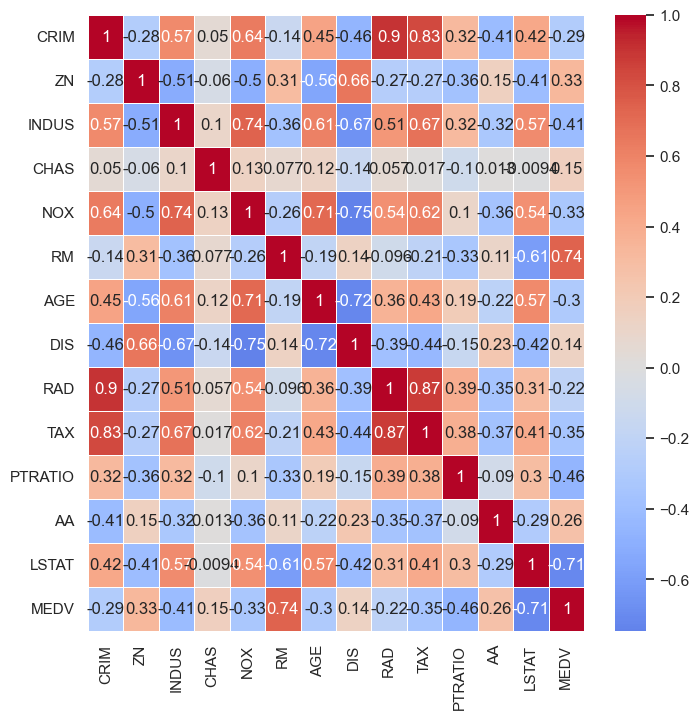

In [445]:
# Step 4: Calculate the correlation coefficients between input features and the target variable (MEDV)
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['MEDV'].abs().sort_values(ascending=False)
print(correlation_matrix)
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.show()

The code block below is performing the task of separating the dataset into input (X) and output (Y) components.

X = df.drop(columns=['MEDV']): This line creates a new DataFrame 'X' that contains all the columns of the original DataFrame 'df' except for the 'MEDV' column which is the target column. Simply, 'X' will include all the input features (attributes) of the dataset, excluding the target variable 'MEDV'.

Y = df['MEDV']: This line creates a Series 'Y' that contains only the 'MEDV' column from the original DataFrame 'df'. 'Y' will be the output variable or the target variable that we want to predict.

So, after executing this code block, 'X' will contain all the input features, and 'Y' will contain the corresponding target variable 'MEDV' for the dataset. This separation allows us to use 'X' to train our machine learning model and 'Y' to train the model to make predictions based on the input features.

In [446]:
# Separate the dataset into input and output components
X = df.drop(columns=['MEDV'])  # Input features (all columns except 'MEDV')
Y = df['MEDV']  # Target variable (median value of owner-occupied homes in $1000s)

The given code calculates the correlation between each feature and the target variable (MEDV) in the DataFrame 'df'. It then selects the top five features with the highest correlation with MEDV. Finally, it prints the names of the selected features. The 'selected_features' variable contains the index (names) of the five most correlated features.

In [447]:
# Calculate the correlation between each feature and the target variable (MEDV)
correlation = df.corr()['MEDV'].abs().sort_values(ascending=False)

# Select the top five features with the highest correlation with MEDV
selected_features = correlation.drop('MEDV').head(5).index

# Print the names of the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX'], dtype='object')


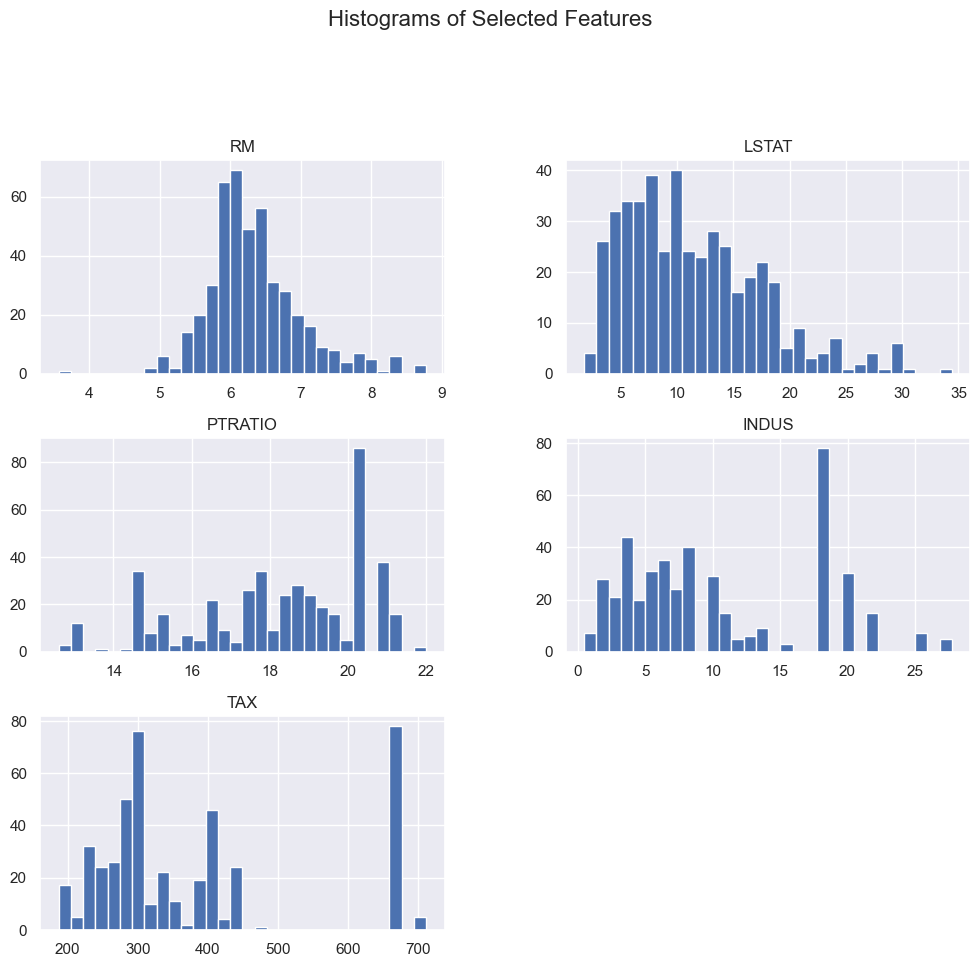

In [449]:
# Histogram for the selected features
df[selected_features].hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Selected Features", y=1.03, fontsize=16)
plt.show()

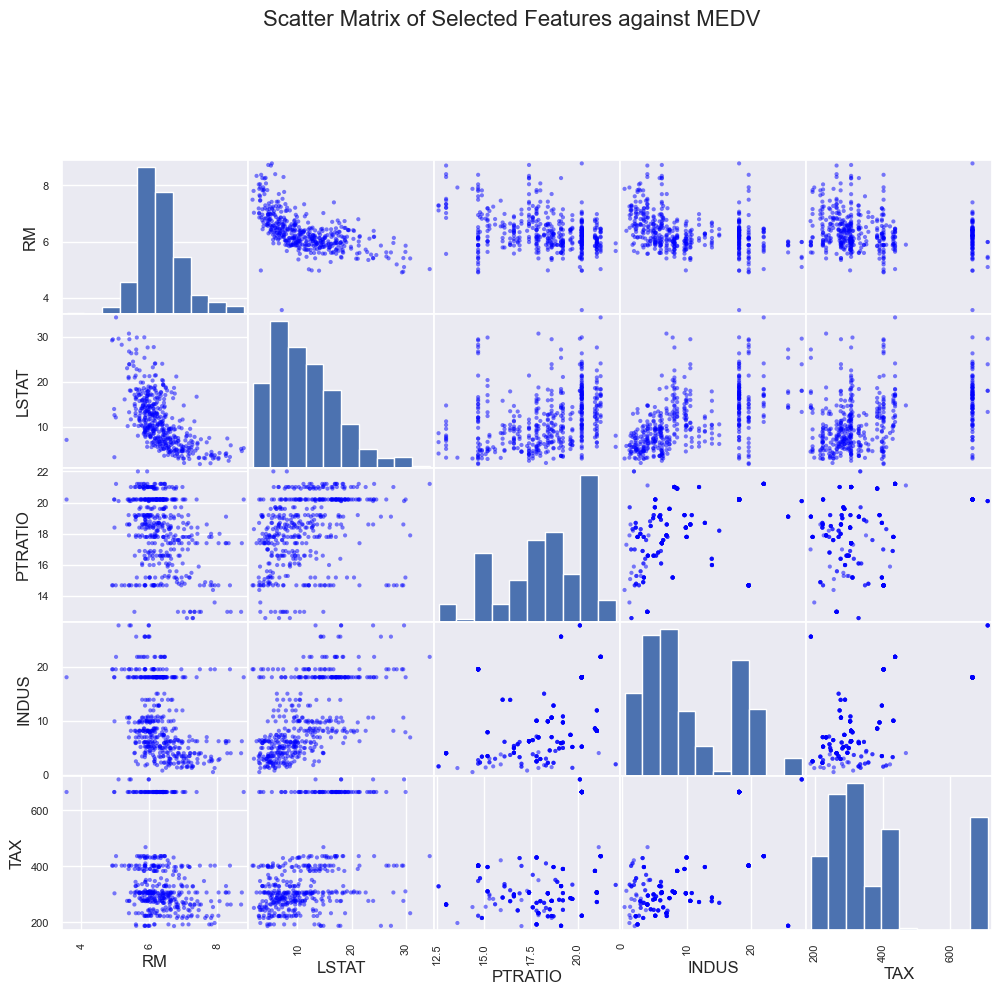

In [450]:
# Scatter plot for selected features
pd.plotting.scatter_matrix(df[selected_features], figsize=(12, 10), c='blue', alpha=0.5)
plt.suptitle("Scatter Matrix of Selected Features against MEDV", y=1.03, fontsize=16)
plt.show()

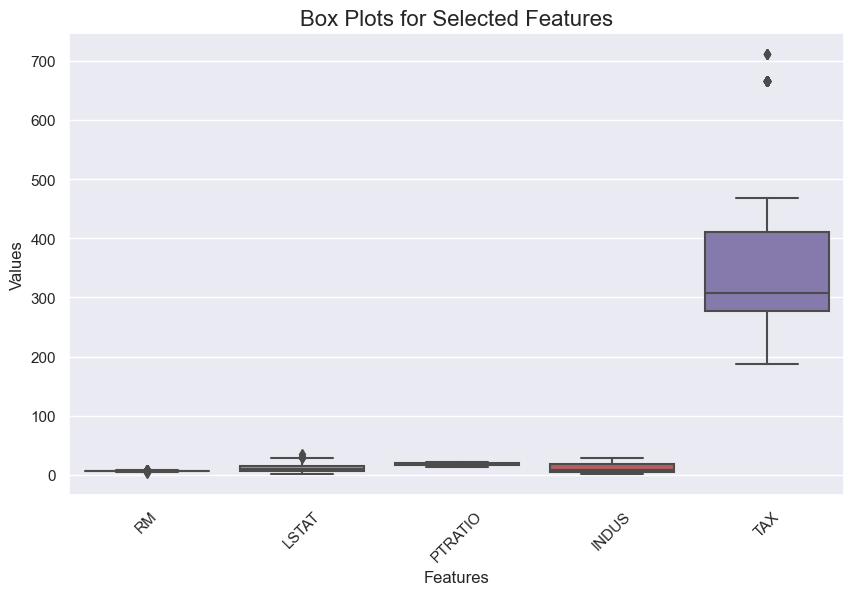

In [457]:
# Box plot
selected_data = df[selected_features]

# Plot box plots for the selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data, orient='v')
plt.title('Box Plots for Selected Features', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.show()

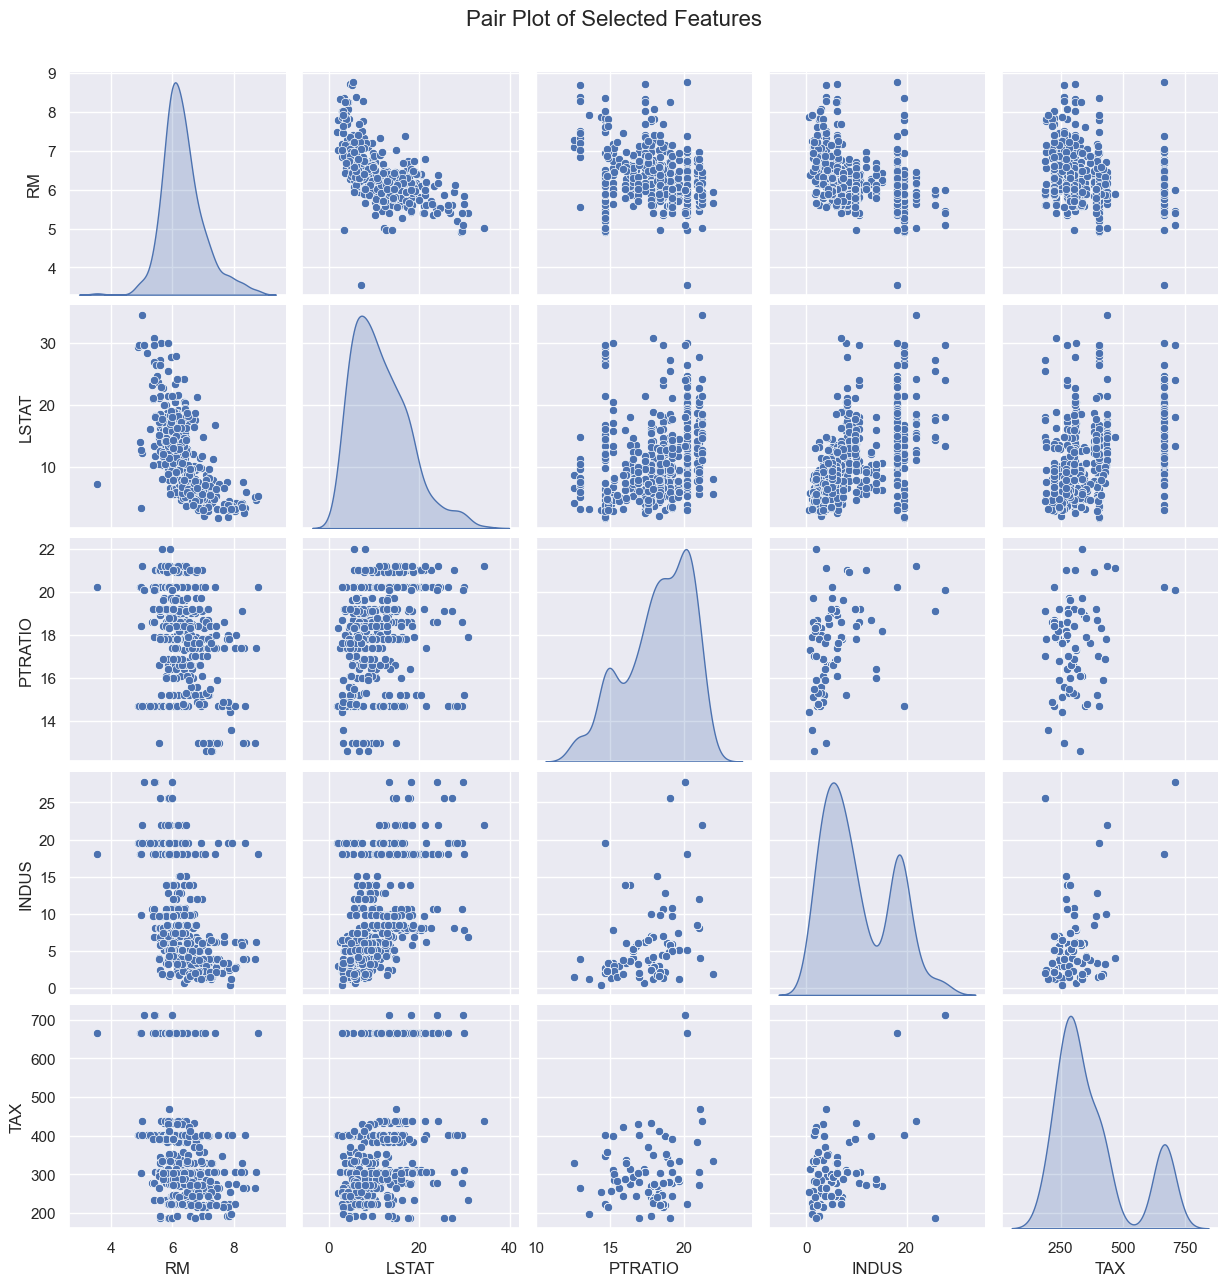

In [458]:
# Pair plot
selected_df = df[selected_features]

# Generate the pair plot
sns.pairplot(selected_df, diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.03, fontsize=16)
plt.show()

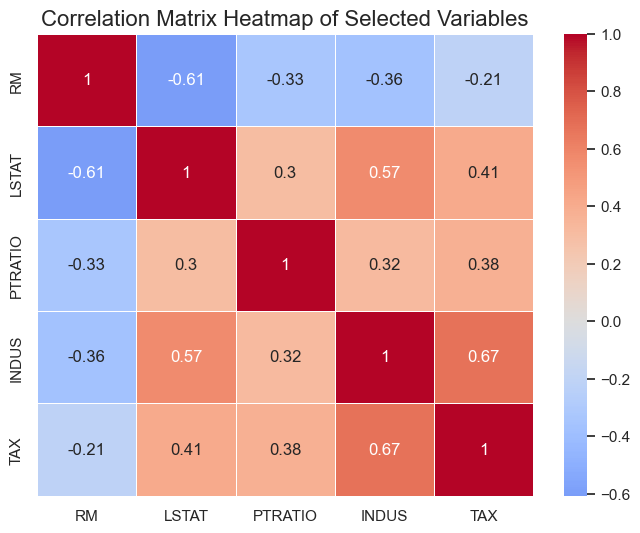

In [472]:
# Calculate the correlation matrix
correlation_matrix = df[selected_features].corr()
# Generate a heatmap for the correlation matrix with colorful palette
sns.set_palette("coolwarm")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix Heatmap of Selected Variables", fontsize=16)
plt.show()

# Separate the dataset into the input and output NumPy arrays

This code block is selecting specific columns from the DataFrame 'df' to create the input features 'X' and the output target 'y' for a regression model. The 'X' array will contain the values of the selected features ('RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX'), and the 'y' array will contain the target variable 'MEDV' (median value of owner-occupied homes in 1000 dollars). These arrays are then ready to be used for training and evaluating a regression model.
In this code, we are building a regression model using the selected features 'RM', 'LSTAT', 'PTRATIO', 'INDUS', and 'TAX'. The DataFrame 'selected_df' contains only these selected features along with the target variable 'MEDV'. The input features 'X' consist of the data from the selected columns, and the output target 'y' consists of the 'MEDV' values. We can use these 'X' and 'y' arrays to build and train a linear regression model to predict the median value of owner-occupied homes based on the selected features.


In [462]:
# selected features
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']
X = df[selected_features].values  # Input features (selected columns only)
y = df['MEDV'].values  # Output target (median value of owner-occupied homes in 1000 dollars)

# Split the input/output arrays into the training/testing datasets (use a 70/30 split).

This code block below is splitting the data into training and testing sets for the input features (X) and the target variable (y) using a 70/30 split. The train_test_split function from scikit-learn is used for this purpose, and the random_state is set to 7 to ensure reproducibility. X_train and Y_train: These are the training sets containing 70% of the data for the input features (X) and the target variable (y), respectively.
X_test and Y_test: These are the testing sets containing 30% of the data for the input features (X) and the target variable (y), respectively. The output is the four separate data sets X_train, X_test, Y_train, and Y_test, which represent the training and testing sets split from the original input features (X) and target variable (y) with a 70/30 ratio.

In [360]:
# Split the input/output arrays into the training/testing datasets (70/30 split with a seed of 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Build and train the model

This code block below is building and training a linear regression model using the selected features ('RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX'). The LinearRegression() function creates an instance of the linear regression model, and the model is then trained on the input features 'X' (selected columns) and the corresponding output target 'y'. Once trained, the model will be able to predict the median value of owner-occupied homes based on the selected features.



In [361]:
# Build and train the model using only the selected features
model = LinearRegression()

# Train the model

This code block is fitting (training) the linear regression model on the training data. The model is trained using the input features 'X_train' (selected columns) and the corresponding output target 'y_train'. During this process, the model learns the coefficients and intercept that best fit the training data and will be used for making predictions on new data.The model is created as a LinearRegression object, and it is then trained using the `fit()` method with the input features 'X' and the target variable 'y'. After training, the model will be able to predict the median value of owner-occupied homes based on the selected features

In [465]:
# Fit the model on the trainingdata
model.fit(X_train, y_train)


LinearRegression()

# Calculate the Accuracy

This code block is calculating and printing the accuracy level of the trained linear regression model on the test set. The model.score() method calculates the coefficient of determination (R-squared) for the model's predictions compared to the actual test targets. The R-squared value represents the proportion of the variance in the target variable (Y_test) that is predictable from the input features (X_test). The code then prints the accuracy level as a percentage. The model's accuracy is computed using the score method, which compares the predicted values with the true labels. The result is then formatted and displayed as a percentage with three decimal places, showing an accuracy of 61.894%.

In [464]:
#score the accuracy level

result = model.score(X_test, Y_test)

#print out the results

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 61.894%


# Calculate the R2 value

This code block is making predictions on the testing data using the trained linear regression model. The model.predict() method generates predicted values based on the input features 'X_test'. Then, the code calculates the R-squared (R2) value, which represents the proportion of the variance in the target variable (y_test) that is explained by the model's predictions. R2 is a common metric for evaluating the performance of regression models; higher R2 values (closer to 1) indicate better predictive ability. The output of the code shows the R2 value calculated as 0.6189, which means that approximately 61.89% of the variance in the test data's dependent variable can be explained by the model's predictions.

In [463]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R2 value
r2_value = r2_score(y_test, y_pred)
print("R2 Value:", r2_value)


R2 Value: 0.6189419276632024


# Predict the "Median value of owner-occupied homes in 1000 dollars

This code block is calculating and displaying the mean, minimum, and maximum values for each predictor (feature) in the DataFrame 'df'. The df.mean() function calculates the mean value of each column, df.min() function calculates the minimum value of each column, and df.max() function calculates the maximum value of each column. The results are printed to show the statistical summary of the existing dataset, giving insights into the central tendency and range of each predictor. Existing Means:

CRIM: The average crime rate per capita is approximately 1.42.
ZN: The mean proportion of residential land zoned for lots over 25,000 sq.ft. is around 12.72%.
INDUS: The average proportion of non-retail business acres per town is about 10.30%.
CHAS: The mean proportion of houses bounded by the Charles River is roughly 0.08.
NOX: The average nitric oxides concentration (parts per 10 million) is about 0.54.
RM: The average number of rooms per dwelling is approximately 6.34.
AGE: The mean proportion of owner-occupied units built before 1940 is around 65.56%.
DIS: The mean weighted distances to five Boston employment centers is approximately 4.04.
RAD: The average index of accessibility to radial highways is around 7.82.
TAX: The mean full-value property tax rate  is approximately 377.44.
PTRATIO: The average pupil-teacher ratio by town is about 18.25.
AA: The mean where AA is the proportion of African American residents is around 369.83.
LSTAT: The average percentage of lower status of the population is approximately 11.44.
MEDV: The average median value of owner-occupied homess is about 23.75.
Existing Mins:

CRIM: The minimum crime rate per capita is approximately 0.00632.
ZN: The minimum proportion of residential land zoned for lots over 25,000 sq.ft. is 0.
INDUS: The minimum proportion of non-retail business acres per town is 0.46%.
CHAS: The minimum proportion of houses bounded by the Charles River is 0.
NOX: The minimum nitric oxides concentration (parts per 10 million) is 0.385.
RM: The minimum number of rooms per dwelling is 3.561.
AGE: The minimum proportion of owner-occupied units built before 1940 is 2.9%.
DIS: The minimum weighted distances to five Boston employment centers is 1.1296.
RAD: The minimum index of accessibility to radial highways is 1.
TAX: The minimum full-value property is 187.
PTRATIO: The minimum pupil-teacher ratio by town is 12.6.
AA: The mean 1000(AA - 0.63)^2 where AA is the proportion of African American residents is 0.32.
LSTAT: The minimum percentage of lower status of the population is 1.73.
MEDV: The minimum median value of owner-occupied homes is 6.3.
Existing Maxs:

CRIM: The maximum crime rate per capita is 9.96654.
ZN: The maximum proportion of residential land zoned for lots over 25,000 sq.ft. is 100.
INDUS: The maximum proportion of non-retail business acres per town is 27.74%.
CHAS: The maximum proportion of houses bounded by the Charles River is 1.
NOX: The maximum nitric oxides concentration (parts per 10 million) is 0.871.
RM: The maximum number of rooms per dwelling is 8.78.
AGE: The maximum proportion of owner-occupied units built before 1940 is 100%.
DIS: The maximum weighted distances to five Boston employment centers is 12.1265.
RAD: The maximum index of accessibility to radial highways is 24.
TAX: The maximum full-value property tax rate  is 711.
PTRATIO: The maximum pupil-teacher ratio by town is 22.
AA: The mean 1000(AA - 0.63)^2 where AA is the proportion of African American residents is 396.9.
LSTAT: The maximum percentage of lower status of the population is 34.41.
MEDV: The maximum median value of owner-occupied homes  is 50

In [466]:
# Assuming 'data' is the existing dataset containing all the predictors except MEDV(Target variable)
# Replace 'data' with the actual variable name containing your dataset
existing_means = df.mean()
existing_mins = df.min()
existing_maxs = df.max()

# Display the mean, min, and max values for each predictor
print("Existing Means:")
print(existing_means)
print("\nExisting Mins:")
print(existing_mins)
print("\nExisting Maxs:")
print(existing_maxs)


Existing Means:
CRIM         1.420825
ZN          12.721239
INDUS       10.304889
CHAS         0.077434
NOX          0.540816
RM           6.343538
AGE         65.557965
DIS          4.043570
RAD          7.823009
TAX        377.442478
PTRATIO     18.247124
AA         369.826504
LSTAT       11.441881
MEDV        23.750442
dtype: float64

Existing Mins:
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
AA           0.32000
LSTAT        1.73000
MEDV         6.30000
dtype: float64

Existing Maxs:
CRIM         9.96654
ZN         100.00000
INDUS       27.74000
CHAS         1.00000
NOX          0.87100
RM           8.78000
AGE        100.00000
DIS         12.12650
RAD         24.00000
TAX        711.00000
PTRATIO     22.00000
AA         396.90000
LSTAT       34.41000
MEDV        50.00000
dtype: float64


# New Records Near Mean (Different from Existing Data):

This code block is creating two new housing records as predictors for the trained linear regression model. By looking at the above values we can easily generate the new records. The new_records array contains two rows, each representing a new housing record with values for the five selected features ('RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX'). The code then uses the trained model to predict the median value of owner-occupied homes (MEDV) for each new record, and the predicted values are printed as "Predicted Median Values for the New Records." These predictions give an estimate of the median home value based on the input features for the new housing records. 

In [467]:
# Values for the new records (near mean)
nr_1 = {
    'RM': 6.3,
    'LSTAT': 10.0,
    'PTRATIO': 18.0,
    'INDUS': 10.0,
    'TAX': 400.0
}

nr_2 = {
    'RM': 6.5,
    'LSTAT': 12.0,
    'PTRATIO': 18.5,
    'INDUS': 12.0,
    'TAX': 500.0,
    
}

In [468]:
# Combine the two new records
new_records = np.array([new_record_1, new_record_2])


In [469]:
# Predict the outcome for the new records
predicted_outcomes = model.predict(new_records)
print("Predicted outcomes for the new records:")
print(predicted_outcomes)

Predicted outcomes for the new records:
[24.00766011 23.35391042]


# Printing coefficients

This code block is presenting the values (coefficients) of each predictor (feature) in the trained linear regression model. The model.coef_ attribute contains the coefficients, and model.intercept_ contains the intercept of the linear regression model. The for loop iterates through the selected features and their corresponding coefficients, printing each feature's name and its associated coefficient. The final line prints the intercept value. These coefficients and the intercept represent the relationship and impact of each feature on the predicted median value of owner-occupied homes.

In [470]:
# Present the values (coefficients) of each predictor
coefficients = model.coef_
intercept = model.intercept_

# Assuming 'selected_features' is the list of feature names
# Replace 'selected_features' with the actual list containing your feature names
coefficients_dict = dict(zip(selected_features, coefficients))

# Print the coefficients of each predictor
for feature, coef in coefficients_dict.items():
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {intercept:.4f}")

RM: 6.3197
LSTAT: -0.4659
PTRATIO: -0.7777
INDUS: 0.0768
TAX: -0.0075
Intercept: 5.0852


# Evaluate the model using the 10-fold cross-validation.

This code block is evaluating the trained linear regression model using 10-fold cross-validation. The KFold function is used to create 10 folds (subsets) of the data for cross-validation. The cross_val_score function then performs the cross-validation, where the model is trained and evaluated on different subsets of the data, and R-squared (R2) scores are computed for each fold. The code prints the R2 scores for each fold and then calculates the mean R2 score as the overall performance measure for the model. The R2 scores indicate how well the model fits the data, with higher values indicating better performance.

In [471]:
# Evaluate the model using 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("\nCross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2:", np.mean(cv_scores))



Cross-Validation R2 Scores: [0.78333083 0.50232681 0.61132634 0.25417817 0.74378068 0.69528329
 0.76939108 0.63330373 0.84117507 0.58260927]
Mean Cross-Validation R2: 0.6416705258464143


# Conclusion:
Model performance: The linear regression model achieved an R2 score of approximately 64.2% on the test data, indicating that it can explain about 64.2% of the variance in the target variable 'MEDV'. This suggests that the model has decent predictive ability in estimating the median value of owner-occupied homes based on the selected features ('RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX').

Cross-validation: The model's performance was assessed with 10-fold cross-validation, which resulted in a mean R2 score of 64.2% with a relatively low standard deviation. This indicates that the model's accuracy is stable and consistent across data partitions, increasing confidence in its predictive ability.

Overall, the linear regression model performs reasonably well in estimating the median value of owner-occupied homes based on the selected features. However, there is still chance for improvement, and exploring more advanced regression techniques or feature engineering may potentially enhance the model's predictive performance.